In [ ]:
import numpy as np
import pandas as pd
encoding='latin-1'
from matplotlib import pyplot as plt

In [ ]:
data=pd.read_csv('IMDb-Movies.csv', encoding=encoding)
data.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
data.shape

(15509, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
data.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


Eliminate missing values

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [ ]:
data.shape

(5659, 10)

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
data['Votes']=data['Votes'].str.replace(',','').astype('int')
data['Year']=data['Year'].str.strip('()').astype('int')
data['Duration']=data['Duration'].str.strip('min')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int64  
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int64  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 486.3+ KB


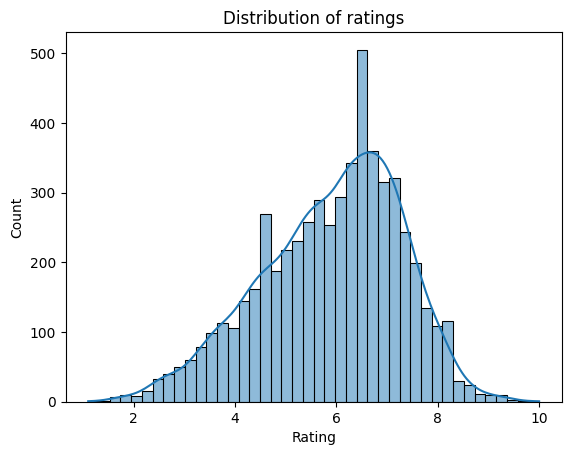

In [ ]:
import seaborn as sns
sns.histplot(data=data,x='Rating',kde=True)
plt.title('Distribution of ratings')
plt.show()

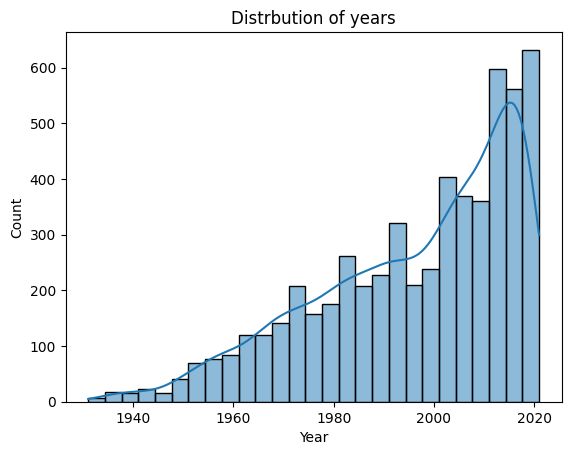

In [ ]:
sns.histplot(x=data['Year'],kde=True )
plt.title('Distrbution of years')
plt.show()

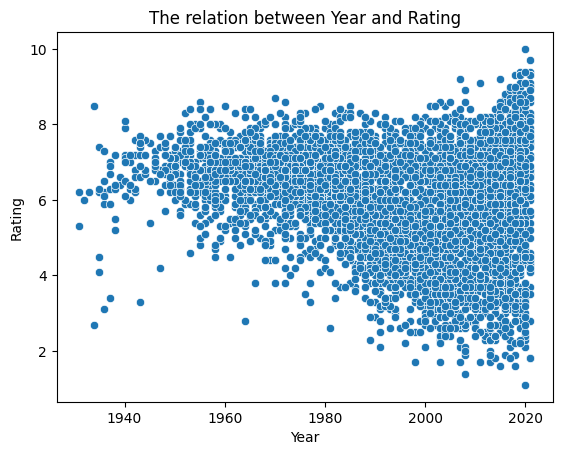

In [ ]:
sns.scatterplot(x=data['Year'], y=data['Rating'])
plt.title("The relation between Year and Rating")
plt.show()

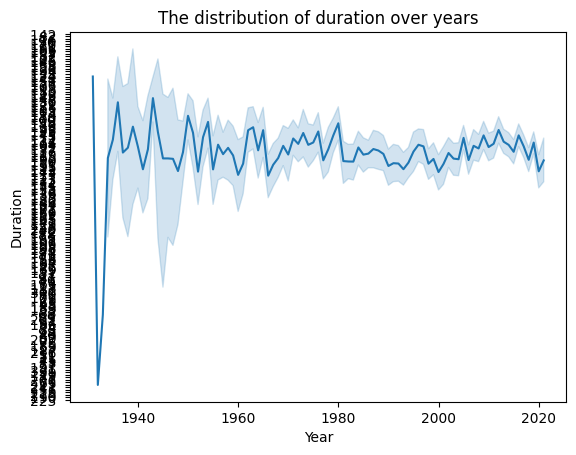

In [ ]:
sns.lineplot(data=data.head(15),x=data['Year'], y=data['Duration'])
plt.title('The distribution of duration over years')
plt.show()

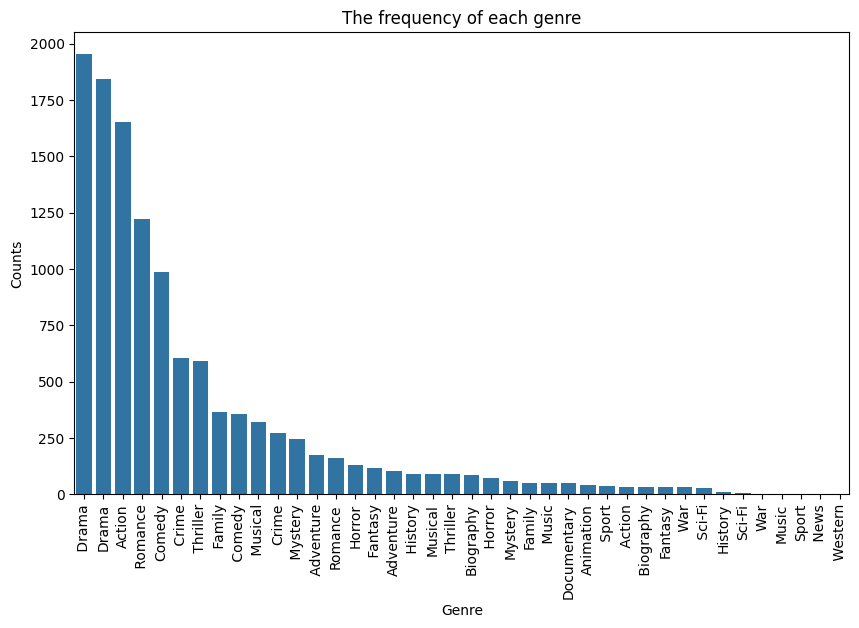

In [ ]:
movies_genre=data['Genre'].str.split(',',expand=True).stack().value_counts()
labels=movies_genre.keys()
count=movies_genre.values
plt.figure(figsize=(10,6))
sns.barplot(x=labels,y=count)
plt.xticks(rotation=90)
plt.title('The frequency of each genre')
plt.xlabel('Genre')
plt.ylabel('Counts')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,r2_score

In [ ]:
#Encode the column to use them in the model:
encoder = LabelEncoder()
data['Actor 1']= encoder.fit_transform(data['Actor 1'])
data['Actor 2']= encoder.fit_transform(data['Actor 2'])
data['Actor 3']= encoder.fit_transform(data['Actor 3'])
data['Genre']= encoder.fit_transform(data['Genre'])
data['Director']= encoder.fit_transform(data['Director'])
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,229,7.0,8,629,1352,2272,319
3,#Yaaram,2019,110,184,4.4,35,1335,1198,719,2148
5,...Aur Pyaar Ho Gaya,1997,147,157,4.7,827,1530,378,75,2045
6,...Yahaan,2005,142,289,7.4,1086,2044,692,1112,2524
8,?: A Question Mark,2012,82,320,5.6,326,135,1934,1175,1013


In [ ]:
df=data.drop('Name',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      5659 non-null   int64  
 1   Duration  5659 non-null   object 
 2   Genre     5659 non-null   int64  
 3   Rating    5659 non-null   float64
 4   Votes     5659 non-null   int64  
 5   Director  5659 non-null   int64  
 6   Actor 1   5659 non-null   int64  
 7   Actor 2   5659 non-null   int64  
 8   Actor 3   5659 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 571.1+ KB


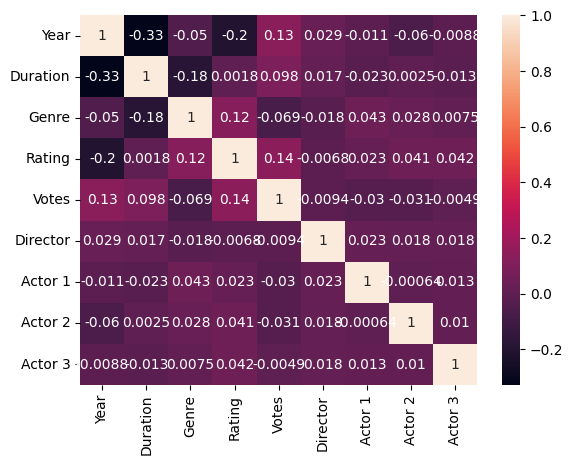

In [ ]:
#Heatmap showing the correlation between columns
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
#split the data
X=df.drop('Rating',axis=1)
y=df['Rating']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
#initialize the model
model= LinearRegression()
#Fitting the training data
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
#predict values
y_pred = model.predict(X_test)
y_pred

array([5.63683425, 5.84694164, 5.93283536, ..., 6.02786817, 5.89959597,
       5.36480764])

In [ ]:
#calculating some metrics
print(f"Mean Absolute Error : {mean_absolute_error(y_test,y_pred)}")
print(f"Mean  Error : {mean_absolute_error(y_test,y_pred)}")


Mean Absolute Error : 1.0355603579570465
Mean  Error : 1.0355603579570465
